In [ ]:
!pip -q install torchcodec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:00


1. Load a speech signal

In [1]:
import torchaudio
import matplotlib.pyplot as plt
import torch

audio_path = "LJ025-0076.wav"
waveform, sr = torchaudio.load(audio_path)

print("Waveform shape:", waveform.shape)
print("Sampling rate:", sr)
print("Duration (sec):", waveform.shape[1] / sr)

Waveform shape: torch.Size([1, 185146])
Sampling rate: 22050
Duration (sec): 8.396643990929705


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\torchaudio\_backend\utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(


2. Preprocess the audio (convert to mono, resample to 16kHz).

In [2]:
import librosa
import numpy as np
import soundfile as sf

audio_path = "LJ025-0076.wav"

audio, sr = librosa.load(audio_path, sr=None, mono=True)

print("Before preprocessing:")
print("Sampling rate:", sr)
print("Duration (sec):", len(audio) / sr)

target_sr = 16000
if sr != target_sr:
    audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    sr = target_sr

print("\nAfter preprocessing:")
print("Sampling rate:", sr)
print("Duration (sec):", len(audio) / sr)

output_path = "/content/Audio_Python_16kHz_mono.wav"
sf.write(output_path, audio, sr)

print("\n Saved preprocessed audio at:", output_path)

Before preprocessing:
Sampling rate: 22050
Duration (sec): 8.396643990929705

After preprocessing:
Sampling rate: 16000
Duration (sec): 8.3966875

 Saved preprocessed audio at: /content/Audio_Python_16kHz_mono.wav


3. Use a pre-trained deep learning model (Wav2Vec2) to recognize phonemes.

In [7]:
!pip install -q phonemizer

In [6]:
!pip -q install transformers g2p_en

In [4]:
pip install nltk


  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install transformers


In [12]:
import sys
!{sys.executable} -m pip install transformers


  Using cached transformers-5.0.0-py3-none-any.whl.metadata (37 kB)
  Using cached huggingface_hub-1.3.4-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.22.2-cp39-abi3-win_amd64.whl.metadata (7.4 kB)
  Using cached typer_slim-0.21.1-py3-none-any.whl.metadata (16 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached transformers-5.0.0-py3-none-any.whl (10.1 MB)
Using cached huggingface_hub-1.3.4-py3-none-any.whl (536 kB)
Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl (2.9 MB)
Using cached tokenizers-0.22.2-cp39-abi3-win_amd64.whl (2.7 MB)
Using cached shellingham-1.5.4-py2.py3-none-any.whl (9.8 kB)
Using cached typer_slim-0.21.1-py3-none-any.whl (47 kB)

   ------------- -------------------------- 2/6 [typer-slim]
   ------------- -------------------------- 2/6 [typer-slim]
  Attempting uninstall: huggingface-hub
   ------------- -------------------------- 2/6 [typer


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import sys

!{sys.executable} -m pip install -U transformers torch librosa nltk g2p_en sentencepiece accelerate


  Using cached g2p_en-2.1.0-py3-none-any.whl.metadata (4.5 kB)
  Using cached inflect-7.5.0-py3-none-any.whl.metadata (24 kB)
  Using cached Distance-0.1.3.tar.gz (180 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached more_itertools-10.8.0-py3-none-any.whl.metadata (39 kB)
  Using cached typeguard-4.4.4-py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/113.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/113.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/113.7 MB 2.4 MB/s eta 0:00:48
   ---------------------------------------- 0.8/113.7 MB 2.1 MB/s eta 0:00:54
   ---------------------------------------- 1.3/113.7 MB 1.9 MB/s eta 0:01:01
   ---------------------------------------- 1.3/113.7 MB 1.9 MB/s eta 0:01:01
    --------------------------------------- 1.6/113.7 MB 1.3 MB/

  DEPRECATION: Building 'distance' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'distance'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-addons 0.22.0 requires typeguard<3.0.0,>=2.7, but you have typeguard 4.4.4 which is incompatible.
torchaudio 2.8.0 requires torch==2.8.0, but you have torch 2.10.0 which is incompatible.
torchvision 0.23.0 requires torch==2.8.0, but you have torch 2.10.0 which is incompatible.

[notice] A new release of pip is avail

In [15]:
import numpy as np
import torch
import librosa
import nltk
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from g2p_en import G2p

nltk.download("punkt", quiet=True)
nltk.download("averaged_perceptron_tagger", quiet=True)
nltk.download("averaged_perceptron_tagger_eng", quiet=True)
nltk.download("cmudict", quiet=True)

audio_path = "LJ025-0076.wav"
audio, sr = librosa.load(audio_path, sr=16000, mono=True)

assert sr == 16000, "Sampling rate must be 16kHz"

print("Expected outputs")
print("Loaded audio path:", audio_path)
print("Sampling rate:", sr)
print("Input audio samples:", len(audio))
print("Input duration (sec):", round(len(audio) / sr, 3))

model_name = "facebook/wav2vec2-base-960h"
processor = Wav2Vec2Processor.from_pretrained(model_name)
model = Wav2Vec2ForCTC.from_pretrained(model_name)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
model.eval()

print("\nModel loaded:", model_name)
print("Device:", device)

inputs = processor(audio, sampling_rate=sr, return_tensors="pt", padding=True)
input_values = inputs.input_values.to(device)

print("Model input tensor shape:", tuple(input_values.shape))

with torch.no_grad():
    logits = model(input_values).logits

print("Logits shape:", tuple(logits.shape))

pred_ids = torch.argmax(logits, dim=-1)
transcript = processor.batch_decode(pred_ids)[0].strip()

print("\nRecognized text (ASR output):")
print(transcript)

g2p = G2p()
phonemes = [p for p in g2p(transcript) if str(p).strip()]

print("\nRecognized phonemes (phoneme sequence):")
print(" ".join(phonemes))

print("\nRecognized phonemes (token list):")
print(phonemes)
print("Total phoneme tokens:", len(phonemes))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\cmudict.zip.


Expected outputs
Loaded audio path: LJ025-0076.wav
Sampling rate: 16000
Input audio samples: 134347
Input duration (sec): 8.397


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--facebook--wav2vec2-base-960h. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Loading weights: 100%|██████████| 212/212 [00:00<00:00, 352.72it/s, Materializing param=


Model loaded: facebook/wav2vec2-base-960h
Device: cpu
Model input tensor shape: (1, 134347)
Logits shape: (1, 419, 32)

Recognized text (ASR output):
MANY ANIMALS OF EVEN COMPLEX STRUCTURE WHICH LIVE PARASITICALLY WITHIN OTHERS ARE WHOLLY DEVOID OF AN ALIMENTARY CAVITY

Recognized phonemes (phoneme sequence):
M EH1 N IY0 AE1 N AH0 M AH0 L Z AH1 V IY1 V IH0 N K AA1 M P L EH0 K S S T R AH1 K CH ER0 W IH1 CH L AY1 V P EH2 R AH0 S IH1 T IH0 K AH0 L IY0 W IH0 DH IH1 N AH1 DH ER0 Z AA1 R HH OW1 L IY0 D IH0 V OY1 D AH1 V AE1 N AE2 L AH0 M EH1 N T ER0 IY0 K AE1 V AH0 T IY0

Recognized phonemes (token list):
['M', 'EH1', 'N', 'IY0', 'AE1', 'N', 'AH0', 'M', 'AH0', 'L', 'Z', 'AH1', 'V', 'IY1', 'V', 'IH0', 'N', 'K', 'AA1', 'M', 'P', 'L', 'EH0', 'K', 'S', 'S', 'T', 'R', 'AH1', 'K', 'CH', 'ER0', 'W', 'IH1', 'CH', 'L', 'AY1', 'V', 'P', 'EH2', 'R', 'AH0', 'S', 'IH1', 'T', 'IH0', 'K', 'AH0', 'L', 'IY0', 'W', 'IH0', 'DH', 'IH1', 'N', 'AH1', 'DH', 'ER0', 'Z', 'AA1', 'R', 'HH', 'OW1', 'L', 'IY0', 'D', 'I

4. Estimate phoneme time intervals.

In [16]:
duration_sec = len(audio) / sr
num_tokens = len(phonemes)

assert num_tokens > 0, "No phoneme tokens found. Run Step 3 again."

time_per_token = duration_sec / num_tokens

print("Expected outputs")
print("Total duration (sec):", round(duration_sec, 3))
print("Total phoneme tokens:", num_tokens)
print("Estimated time per token (sec):", round(time_per_token, 4))

phoneme_intervals = []
for i, ph in enumerate(phonemes):
    start_t = i * time_per_token
    end_t = (i + 1) * time_per_token
    phoneme_intervals.append((ph, start_t, end_t))

print("\nFirst 15 estimated phoneme time intervals (phoneme, start, end):")
for row in phoneme_intervals[:15]:
    ph, s, e = row
    print(ph, "|", round(s, 4), "to", round(e, 4))

print("\nLast 5 estimated phoneme time intervals (phoneme, start, end):")
for row in phoneme_intervals[-5:]:
    ph, s, e = row
    print(ph, "|", round(s, 4), "to", round(e, 4))

Expected outputs
Total duration (sec): 8.397
Total phoneme tokens: 89
Estimated time per token (sec): 0.0943

First 15 estimated phoneme time intervals (phoneme, start, end):
M | 0.0 to 0.0943
EH1 | 0.0943 to 0.1887
N | 0.1887 to 0.283
IY0 | 0.283 to 0.3774
AE1 | 0.3774 to 0.4717
N | 0.4717 to 0.5661
AH0 | 0.5661 to 0.6604
M | 0.6604 to 0.7548
AH0 | 0.7548 to 0.8491
L | 0.8491 to 0.9434
Z | 0.9434 to 1.0378
AH1 | 1.0378 to 1.1321
V | 1.1321 to 1.2265
IY1 | 1.2265 to 1.3208
V | 1.3208 to 1.4152

Last 5 estimated phoneme time intervals (phoneme, start, end):
AE1 | 7.925 to 8.0193
V | 8.0193 to 8.1137
AH0 | 8.1137 to 8.208
T | 8.208 to 8.3023
IY0 | 8.3023 to 8.3967


5. Extract a phoneme segment from the speech signal based on time intervals.

In [17]:
import numpy as np
import soundfile as sf

assert sr == 16000, "Sampling rate must be 16kHz"
assert len(phoneme_intervals) > 0, "phoneme_intervals is empty. Run Step 4."

target_index = 5

ph, start_t, end_t = phoneme_intervals[target_index]

start_sample = int(start_t * sr)
end_sample = int(end_t * sr)

start_sample = max(0, min(start_sample, len(audio) - 1))
end_sample = max(start_sample + 1, min(end_sample, len(audio)))

segment = audio[start_sample:end_sample]

out_path = f"/content/extracted_phoneme_{target_index}_{ph}.wav"
sf.write(out_path, segment, sr)

print("Expected outputs")
print("Selected phoneme index:", target_index)
print("Selected phoneme label:", ph)
print("Start time (sec):", round(start_t, 4))
print("End time (sec):", round(end_t, 4))
print("Start sample:", start_sample)
print("End sample:", end_sample)
print("Extracted segment samples:", len(segment))
print("Extracted segment duration (sec):", round(len(segment) / sr, 4))
print("Saved extracted phoneme to:", out_path)

Expected outputs
Selected phoneme index: 5
Selected phoneme label: N
Start time (sec): 0.4717
End time (sec): 0.5661
Start sample: 7547
End sample: 9057
Extracted segment samples: 1510
Extracted segment duration (sec): 0.0944
Saved extracted phoneme to: /content/extracted_phoneme_5_N.wav


6. Save extracted phoneme and visualize each selected phoneme segment from the speech waveform

Expected outputs
Total phoneme intervals: 89
Selected indices: [5, 10, 15]


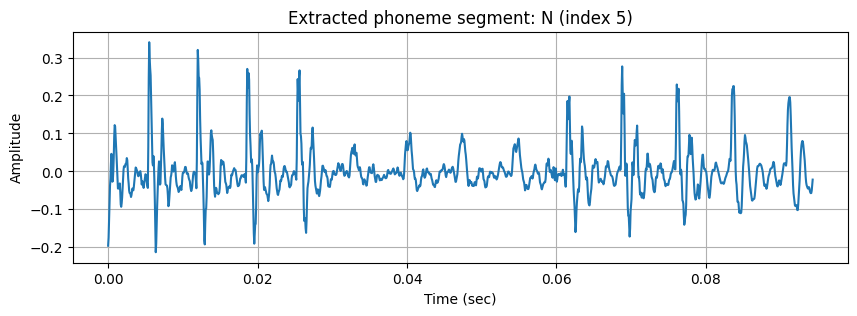


Segment output
Index: 5
Phoneme label: N
Start time (sec): 0.4717
End time (sec): 0.5661
Segment duration (sec): 0.0944
Saved file: /content/extracted_phoneme_5_N.wav


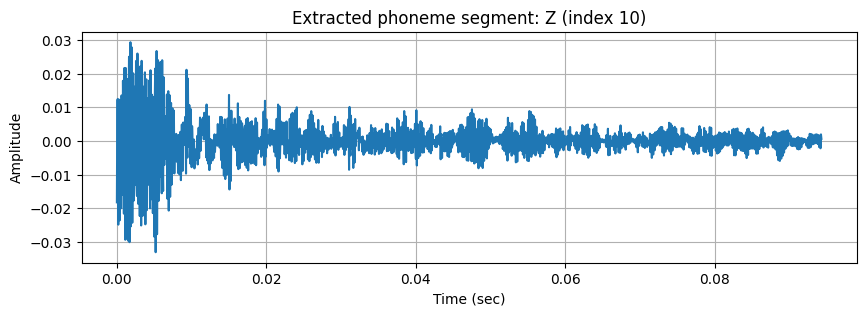


Segment output
Index: 10
Phoneme label: Z
Start time (sec): 0.9434
End time (sec): 1.0378
Segment duration (sec): 0.0943
Saved file: /content/extracted_phoneme_10_Z.wav


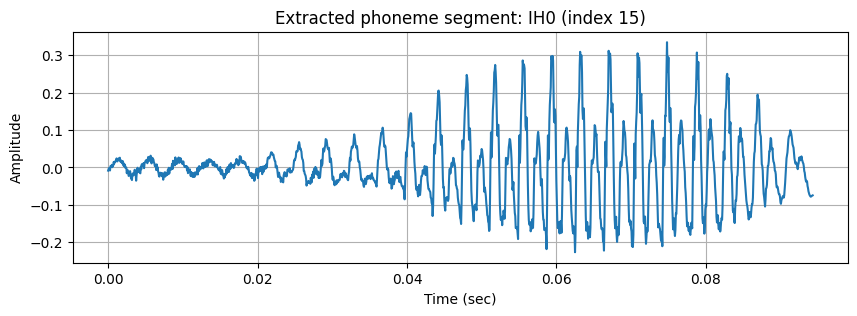


Segment output
Index: 15
Phoneme label: IH0
Start time (sec): 1.4152
End time (sec): 1.5095
Segment duration (sec): 0.0944
Saved file: /content/extracted_phoneme_15_IH0.wav


In [18]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

assert sr == 16000, "Sampling rate must be 16kHz"
assert len(phoneme_intervals) > 0, "phoneme_intervals is empty. Run Step 4 first."

selected_indices = [5, 10, 15]

print("Expected outputs")
print("Total phoneme intervals:", len(phoneme_intervals))
print("Selected indices:", selected_indices)

for idx in selected_indices:
    if idx < 0 or idx >= len(phoneme_intervals):
        print(f"Skipping index {idx} (out of range)")
        continue

    ph, start_t, end_t = phoneme_intervals[idx]

    start_sample = int(start_t * sr)
    end_sample = int(end_t * sr)

    start_sample = max(0, min(start_sample, len(audio) - 1))
    end_sample = max(start_sample + 1, min(end_sample, len(audio)))

    segment = audio[start_sample:end_sample]

    out_path = f"/content/extracted_phoneme_{idx}_{ph}.wav"
    sf.write(out_path, segment, sr)

    seg_t = np.arange(len(segment)) / sr

    plt.figure(figsize=(10, 3))
    plt.plot(seg_t, segment)
    plt.title(f"Extracted phoneme segment: {ph} (index {idx})")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

    print("\nSegment output")
    print("Index:", idx)
    print("Phoneme label:", ph)
    print("Start time (sec):", round(start_t, 4))
    print("End time (sec):", round(end_t, 4))
    print("Segment duration (sec):", round(len(segment) / sr, 4))
    print("Saved file:", out_path)

7. Infer about the nature of source of sound for each phoneme.

In [19]:
import numpy as np

assert sr == 16000, "Sampling rate must be 16kHz"
assert len(phoneme_intervals) > 0, "phoneme_intervals is empty. Run Step 4 first."

selected_indices = [5, 10, 15]

def zero_crossing_rate(x):
    if len(x) < 2:
        return 0.0
    return float(np.mean(x[:-1] * x[1:] < 0))

def rms_energy(x):
    if len(x) == 0:
        return 0.0
    return float(np.sqrt(np.mean(x ** 2)))

def is_vowel_like(phoneme_label):
    if len(phoneme_label) >= 2 and phoneme_label[-1].isdigit():
        return True
    vowel_set = {"AA","AE","AH","AO","AW","AY","EH","ER","EY","IH","IY","OW","OY","UH","UW"}
    return phoneme_label in vowel_set

print("Expected outputs")
print("Selected indices:", selected_indices)
print("For each selected phoneme: RMS energy, ZCR, voiced/unvoiced, phoneme-type inference\n")

for idx in selected_indices:
    if idx < 0 or idx >= len(phoneme_intervals):
        print(f"Skipping index {idx} (out of range)")
        continue

    ph, start_t, end_t = phoneme_intervals[idx]
    start_sample = int(start_t * sr)
    end_sample = int(end_t * sr)

    start_sample = max(0, min(start_sample, len(audio) - 1))
    end_sample = max(start_sample + 1, min(end_sample, len(audio)))

    segment = audio[start_sample:end_sample]

    seg_rms = rms_energy(segment)
    seg_zcr = zero_crossing_rate(segment)

    voiced_flag = seg_zcr < 0.12

    vowel_like = is_vowel_like(ph)

    if vowel_like and voiced_flag:
        source = "Voiced (likely vowel; periodic vocal-fold vibration)"
    elif (not vowel_like) and voiced_flag:
        source = "Voiced (likely voiced consonant/nasal/approximant)"
    elif (not vowel_like) and (not voiced_flag):
        source = "Unvoiced (likely fricative/stop; turbulent noise or burst)"
    else:
        source = "Mixed/uncertain (vowel-like label but unvoiced features; may be alignment/noise)"

    print("Phoneme index:", idx)
    print("Phoneme label:", ph)
    print("Time (sec):", round(start_t, 4), "to", round(end_t, 4))
    print("Segment duration (sec):", round(len(segment) / sr, 4))
    print("RMS energy:", round(seg_rms, 6))
    print("Zero Crossing Rate:", round(seg_zcr, 4))
    print("Voiced/Unvoiced (heuristic):", "Voiced" if voiced_flag else "Unvoiced")
    print("Vowel-like label:", "Yes" if vowel_like else "No")
    print("Inference:", source)
    print("-" * 60)


Expected outputs
Selected indices: [5, 10, 15]
For each selected phoneme: RMS energy, ZCR, voiced/unvoiced, phoneme-type inference

Phoneme index: 5
Phoneme label: N
Time (sec): 0.4717 to 0.5661
Segment duration (sec): 0.0944
RMS energy: 0.06264
Zero Crossing Rate: 0.0981
Voiced/Unvoiced (heuristic): Voiced
Vowel-like label: No
Inference: Voiced (likely voiced consonant/nasal/approximant)
------------------------------------------------------------
Phoneme index: 10
Phoneme label: Z
Time (sec): 0.9434 to 1.0378
Segment duration (sec): 0.0943
RMS energy: 0.005912
Zero Crossing Rate: 0.6532
Voiced/Unvoiced (heuristic): Unvoiced
Vowel-like label: No
Inference: Unvoiced (likely fricative/stop; turbulent noise or burst)
------------------------------------------------------------
Phoneme index: 15
Phoneme label: IH0
Time (sec): 1.4152 to 1.5095
Segment duration (sec): 0.0944
RMS energy: 0.094534
Zero Crossing Rate: 0.0795
Voiced/Unvoiced (heuristic): Voiced
Vowel-like label: Yes
Inference: 